# Assignment 3b code, Group 34
### a1909438, Ziqi Zhang
### a1816653, Zuxing Wu
### a1893169, Jen-Hao Liu

## 1. Read data

In [23]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

df_train = pd.read_csv('../data/Groceries data train.csv')
df_test = pd.read_csv('../data/Groceries data test.csv')

In [24]:
df_train.head()

,Member_number,Date,itemDescription,year,month,day,day_of_week
0,3021,30/01/2015,frankfurter,2015,1,30,4
1,1292,24/10/2015,pork,2015,10,24,5
2,4206,4/04/2014,root vegetables,2014,4,4,4
3,4369,25/08/2015,onions,2015,8,25,1
4,1522,1/07/2014,waffles,2014,7,1,1


In [25]:
df_test.head()

,Member_number,Date,itemDescription,year,month,day,day_of_week
0,3481,8/03/2015,candy,2015,3,8,6
1,1254,19/04/2015,white wine,2015,4,19,6
2,2835,28/01/2014,domestic eggs,2014,1,28,1
3,2854,2/08/2015,coffee,2015,8,2,6
4,4637,12/08/2014,bottled water,2014,8,12,1


## 2. Data preprocessing

In [26]:
print(df_train.shape)
print(df_test.shape)

(27000, 7)
(11765, 7)


In [27]:
# number of unique members in each dataset
print(df_train['Member_number'].nunique())  # 3872
print(df_test['Member_number'].nunique())  # 3566

3872
3566


In [28]:
# check intersection of members between train and test
train_members = set(df_train['Member_number'].unique())
test_members = set(df_test['Member_number'].unique())
intersection = train_members.intersection(test_members)
print("number of common members: ", len(intersection))  # 3540
print("Repetition rate: ", len(intersection) / len(train_members))  # 0.9142561983471075

number of common members:  3540
Repetition rate:  0.9142561983471075


In [29]:
# group data by member number and create a list of items purchased by each member
train_data = df_train.groupby('Member_number')['itemDescription'].apply(set).apply(list).reset_index()
test_data = df_test.groupby('Member_number')['itemDescription'].apply(set).apply(list).reset_index()

In [30]:
# Group the data by 'Member_number' and 'Date', then aggregate the 'itemDescription' into lists
transactions_data = df_train.groupby(['Member_number'])['itemDescription'].apply(list).reset_index()

# Extract the list of transactions
transactions = transactions_data['itemDescription'].tolist()

sorted_transactions = [sorted(list(set(transaction))) for transaction in transactions]

transactions = sorted_transactions

transactions = [transaction for transaction in transactions if len(transaction) > 1]

# Display the first transaction as an example
print(type(transactions))
transactions[0]

<class 'list'>


['canned beer',
 'misc. beverages',
 'pastry',
 'pickled vegetables',
 'sausage',
 'soda',
 'yogurt']

## 3. Exploratory analysis

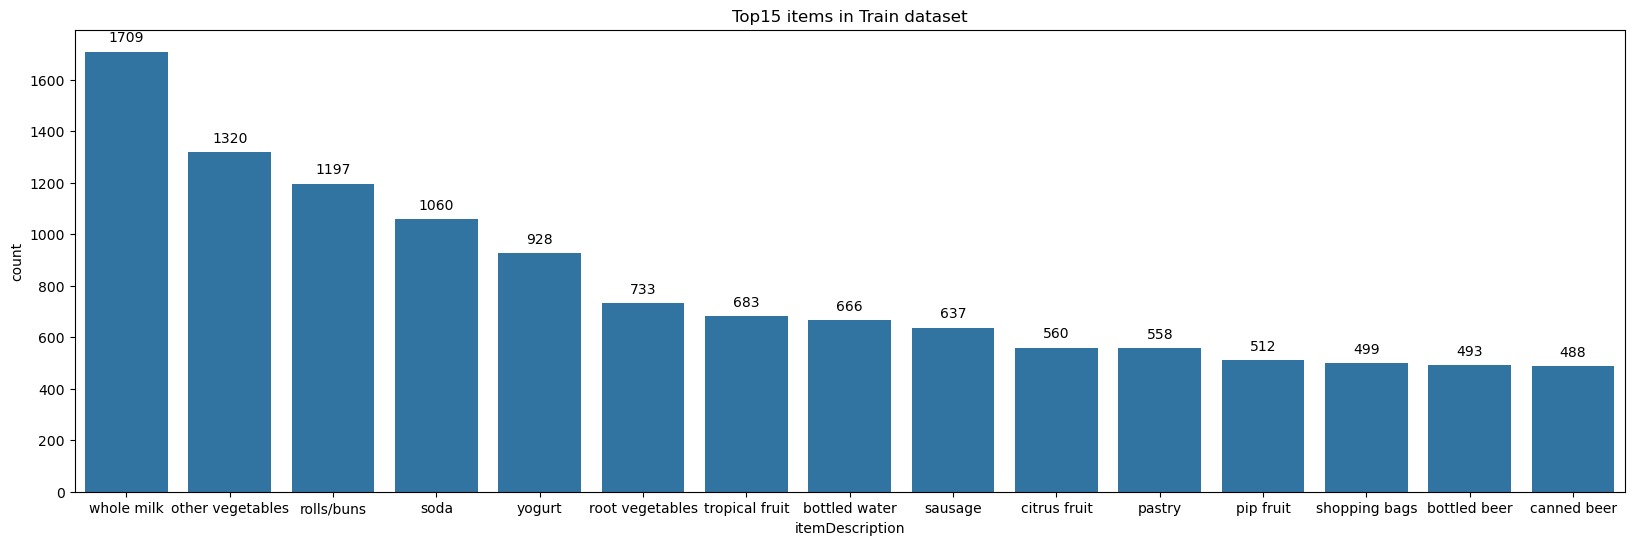

In [31]:
# count the number of items purchased by all members in the df_train
# show the result in a graph in descending order
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20, 6))
plt.title("Top15 items in Train dataset")
ax = sns.countplot(x='itemDescription', data=df_train, order=df_train['itemDescription'].value_counts().index[:15])

# Annotate count number on top of each bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

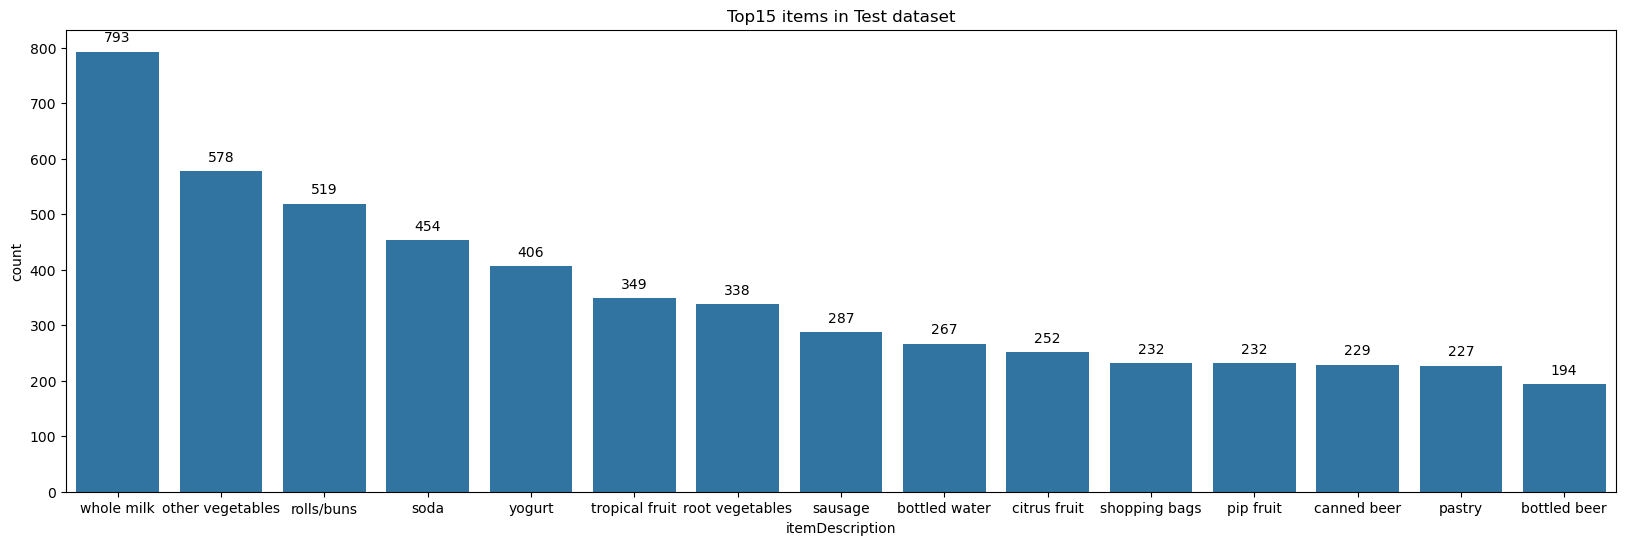

In [32]:
# count the number of items purchased by all members in the df_test
# show the result in a graph in descending order

plt.figure(figsize=(20, 6))
plt.title("Top15 items in Test dataset")
ax = sns.countplot(x='itemDescription', data=df_test, order=df_test['itemDescription'].value_counts().index[:15])

# Annotate count number on top of each bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

Text(0.5, 1.0, 'Number of Items Purchased by Members in Train Data')

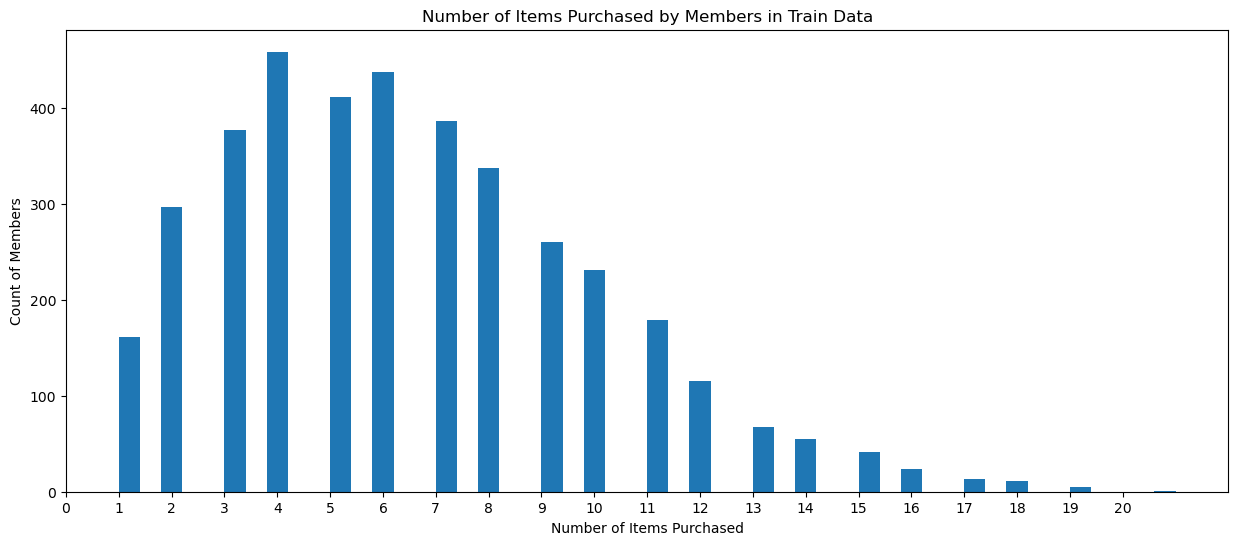

In [33]:
# show number of items purchased by all members in the train data
# x-axis: number of items purchased, y-axis: number of members
plt.figure(figsize=(15, 6))
plt.hist(train_data['itemDescription'].apply(len), bins=50)
plt.xticks(range(0, max(train_data['itemDescription'].apply(len)), 1))
plt.xlabel('Number of Items Purchased')
plt.ylabel('Count of Members')
plt.title('Number of Items Purchased by Members in Train Data')

Text(0.5, 1.0, 'Number of Items Purchased by Members in Test Data')

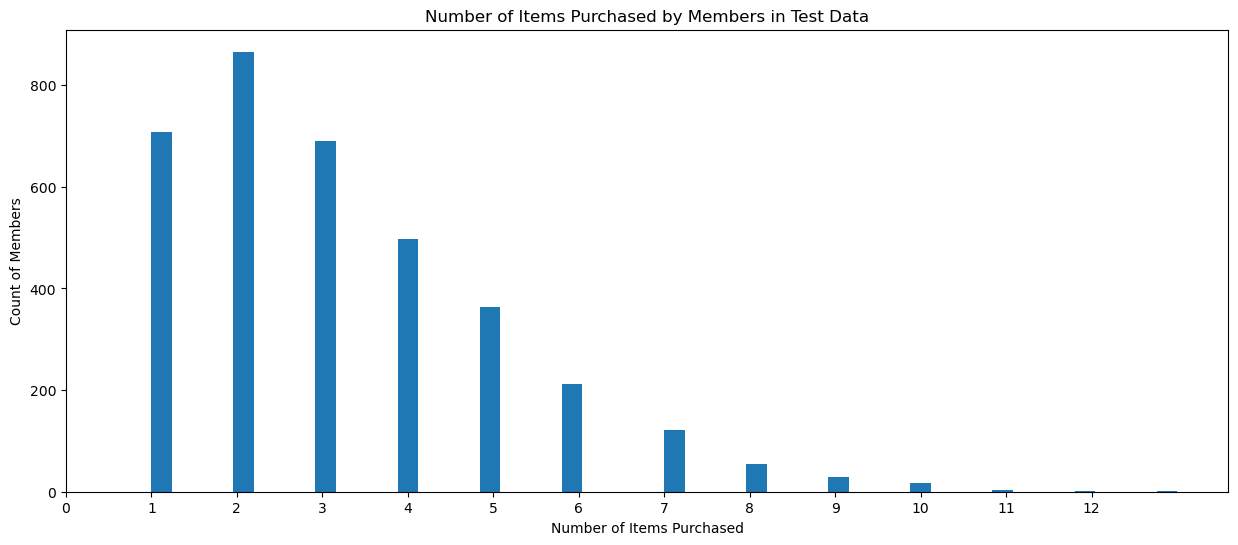

In [34]:
# show number of items purchased by all members in the test data
# x-axis: number of items purchased, y-axis: number of members
plt.figure(figsize=(15, 6))
plt.hist(test_data['itemDescription'].apply(len), bins=50)
plt.xticks(range(0, max(test_data['itemDescription'].apply(len)), 1))
plt.xlabel('Number of Items Purchased')
plt.ylabel('Count of Members')
plt.title('Number of Items Purchased by Members in Test Data')

## 4. Frequent pattern mining

In [35]:
# !pip install apriori
from apyori import apriori
from mlxtend.frequent_patterns import association_rules

rules = apriori(transactions, min_support=0.002, min_confidence=0.8,min_lift=1, min_length=1)
Results = list(rules)
Results

[RelationRecord(items=frozenset({'whole milk', 'bottled water', 'canned vegetables'}), support=0.002425222312045271, ordered_statistics=[OrderedStatistic(items_base=frozenset({'bottled water', 'canned vegetables'}), items_add=frozenset({'whole milk'}), confidence=0.8181818181818182, lift=2.2760665121984465)]),
 RelationRecord(items=frozenset({'whole milk', 'bottled water', 'spices'}), support=0.002425222312045271, ordered_statistics=[OrderedStatistic(items_base=frozenset({'bottled water', 'spices'}), items_add=frozenset({'whole milk'}), confidence=0.8181818181818182, lift=2.2760665121984465)]),
 RelationRecord(items=frozenset({'whole milk', 'butter', 'dishes'}), support=0.002155753166262463, ordered_statistics=[OrderedStatistic(items_base=frozenset({'butter', 'dishes'}), items_add=frozenset({'whole milk'}), confidence=1.0, lift=2.7818590704647677)]),
 RelationRecord(items=frozenset({'whole milk', 'newspapers', 'canned fish'}), support=0.002425222312045271, ordered_statistics=[OrderedSt

In [36]:
df_results = pd.DataFrame(Results)
df_results

,items,support,ordered_statistics
0,"(whole milk, bottled water, canned vegetables)",0.002425,"[((bottled water, canned vegetables), (whole m..."
1,"(whole milk, bottled water, spices)",0.002425,"[((bottled water, spices), (whole milk), 0.818..."
2,"(whole milk, butter, dishes)",0.002156,"[((butter, dishes), (whole milk), 1.0, 2.78185..."
3,"(whole milk, newspapers, canned fish)",0.002425,"[((newspapers, canned fish), (whole milk), 0.8..."
4,"(white bread, napkins, whole milk)",0.004581,"[((white bread, napkins), (whole milk), 0.8095..."
...,...,...,...
81,"(yogurt, other vegetables, whole milk, pip fru...",0.002695,"[((pip fruit, bottled water, yogurt, other veg..."
82,"(whipped/sour cream, whole milk, rolls/buns, s...",0.002425,"[((rolls/buns, bottled water, soda, whipped/so..."
83,"(shopping bags, whole milk, rolls/buns, canned...",0.002695,"[((rolls/buns, shopping bags, canned beer, sod..."
84,"(yogurt, sausage, other vegetables, rolls/buns...",0.002425,"[((yogurt, sausage, frozen vegetables, other v..."


In [37]:
# keep support in a separate data
support = df_results.support

#all four empty list which will contain lhs, rhs, confidance and lift respectively.
first_values = []
second_values = []
third_values = []
fourth_value = []

# loop number of rows time and append 1 by 1 value in a separate list
# first and second element was frozenset which need to be converted in list
for i in range(df_results.shape[0]):
    single_list = df_results['ordered_statistics'][i][0]
    first_values.append(list(single_list[0]))
    second_values.append(list(single_list[1]))
    third_values.append(single_list[2])
    fourth_value.append(single_list[3])

In [38]:
# convert all four list into dataframe for further operation
lhs = pd.DataFrame(first_values)
rhs = pd.DataFrame(second_values)

confidance=pd.DataFrame(third_values,columns=['Confidance'])

lift=pd.DataFrame(fourth_value,columns=['lift'])

In [39]:
# concat all list together in a single dataframe
df_final = pd.concat([lhs,rhs,support,confidance,lift], axis=1)
df_final
df_final.fillna(value=' ', inplace=True)
df_final.head()

,0,1,2,3,0,support,Confidance,lift
0,bottled water,canned vegetables,,,whole milk,0.002425,0.818182,2.276067
1,bottled water,spices,,,whole milk,0.002425,0.818182,2.276067
2,butter,dishes,,,whole milk,0.002156,1.000000,2.781859
3,newspapers,canned fish,,,whole milk,0.002425,0.818182,2.276067
4,white bread,napkins,,,whole milk,0.004581,0.809524,2.251981


In [40]:
#set column name
df_final.columns = ['lhs',1,2,3,'rhs','support','confidance','lift']
df_final.head()

,lhs,1,2,3,rhs,support,confidance,lift
0,bottled water,canned vegetables,,,whole milk,0.002425,0.818182,2.276067
1,bottled water,spices,,,whole milk,0.002425,0.818182,2.276067
2,butter,dishes,,,whole milk,0.002156,1.000000,2.781859
3,newspapers,canned fish,,,whole milk,0.002425,0.818182,2.276067
4,white bread,napkins,,,whole milk,0.004581,0.809524,2.251981


In [41]:
# add all three column to lhs itemset only
df_final['lhs'] = df_final['lhs'] + str(", ")  + df_final[1] + str(", ") + df_final[2] + df_final[3]

df_final['rhs'] = df_final['rhs'] + str(", ")

df_final.drop(columns=[1,2,3],inplace=True)

df_final.sort_values('lift', ascending=False).head(10)

,lhs,rhs,support,confidance,lift
27,"bottled water, waffles, whipped/sour cream","tropical fruit,",0.002156,0.888889,5.294810
21,"bottled water, canned beer, specialty chocolate","root vegetables,",0.002156,0.888889,5.051557
32,"whole milk, pork, candy","yogurt,",0.002156,0.888889,4.175527
77,"whole milk, berries, tropical fruitother veget...","yogurt,",0.002425,0.818182,3.843383
6,"soda, frankfurter, UHT-milk","rolls/buns,",0.002156,1.000000,3.666996
59,"frankfurter, sausage, pastry","soda,",0.002425,0.818182,3.362428
35,"shopping bags, canned beer, domestic eggs","soda,",0.002425,0.818182,3.362428
84,"yogurt, sausage, frozen vegetablesother vegeta...","rolls/buns,",0.002425,0.900000,3.300296
44,"whole milk, citrus fruit, frozen meals","rolls/buns,",0.002695,0.833333,3.055830
60,"whole milk, frozen meals, frozen vegetables","other vegetables,",0.002156,0.888889,3.037446


Note: The code above applies the Apriori algorithm for pattern mining on all transactions and stores the results in a list named Results. These results can be visualized in a tabular format for better analysis and interpretation of the association rules.

In [42]:
from mlxtend.preprocessing import TransactionEncoder

te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df = pd.DataFrame(te_ary, columns=te.columns_)
df

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,True,False,...,False,False,False,True,False,True,False,True,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3706,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3707,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
3708,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3709,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False


In [43]:
from mlxtend.frequent_patterns import apriori

frequent_itemsets = apriori(df, min_support=0.002, use_colnames=True)

rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.4)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Instant food products),(root vegetables),0.011318,0.175963,0.004581,0.404762,2.300263,0.002589,1.384382,0.571738
1,(Instant food products),(soda),0.011318,0.243331,0.004850,0.428571,1.761272,0.002097,1.324171,0.437176
2,(Instant food products),(whole milk),0.011318,0.359472,0.004581,0.404762,1.125991,0.000513,1.076087,0.113174
3,(UHT-milk),(whole milk),0.054702,0.359472,0.023713,0.433498,1.205929,0.004049,1.130671,0.180646
4,(artif. sweetener),(other vegetables),0.005659,0.292643,0.002425,0.428571,1.464483,0.000769,1.237874,0.318970
...,...,...,...,...,...,...,...,...,...,...
5438,"(whole milk, root vegetables, sausage, soda)",(yogurt),0.004850,0.212881,0.002156,0.444444,2.087764,0.001123,1.416815,0.523558
5439,"(whole milk, yogurt, sausage, whipped/sour cream)",(soda),0.005389,0.243331,0.002695,0.500000,2.054817,0.001383,1.513339,0.516120
5440,"(soda, yogurt, sausage, whipped/sour cream)",(whole milk),0.003503,0.359472,0.002695,0.769231,2.139892,0.001435,2.775622,0.534559
5441,"(whole milk, yogurt, soda, whipped/sour cream)",(sausage),0.005389,0.153867,0.002695,0.500000,3.249562,0.001865,1.692266,0.696017


In [44]:
# frequent_itemsets = fpgrowth(df, min_support=0.002, use_colnames=True)
# frequent_itemsets

# from mlxtend.frequent_patterns import association_rules
# rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.4)
# rules

In [45]:
def predict_items(purchased_items):
    # create a list to store the predicted items
    predicted_items = []
    
    # iterate over the top rules
    for index, row in rules.iterrows():
        # get the items in the antecedent and consequent of the rule
        antecedent = row["antecedents"]
        consequent = row["consequents"]
        
        # check if all the items in the antecedent are in the purchased items
        if antecedent.issubset(purchased_items):
            # add the items in the consequent to the predicted items
            for item in consequent:
                if item not in purchased_items and item not in predicted_items:
                    predicted_items.append(item)
    
    # return the list of predicted items
    return predicted_items

In [46]:
# make a prediction for a sample set of purchased items
purchased_items = {'canned beer',
 'misc. beverages',
 'pastry',
 'pickled vegetables',
 'sausage',
 'soda',
 'yogurt'}
predicted_items = predict_items(purchased_items)

# print the predicted items to the console
print(predicted_items)

['whole milk', 'rolls/buns', 'other vegetables', 'pip fruit']


Note: The code above prepares prediction functions based on discovered patterns, which can be used for Task 2. It includes implementations of both the Apriori and FP-Growth algorithms for pattern mining (Apriori is the default algorithm, and the part of the code for FP-Growth is currently commented out with a hash symbol). These functions can be imported and utilized as needed.

## 5. Recommendation from each method

### 5.1 Collaborative filtering recommendation

In [47]:
#see how many unique item in training file
items = df_train['itemDescription'].unique()
items.shape

(167,)

In [48]:
#put same-day-purchased items in one row
member_df = df_train.groupby(['Member_number', 'Date'], as_index=False).agg({
    'itemDescription': ', '.join,
    'year': 'first',  # Retain the year (or use any other appropriate method)
    'month': 'first',  # Retain the month
    'day': 'first',  # Retain the day
    'day_of_week': 'first'  # Retain the day of the week
})
member_df.head(5)

,Member_number,Date,itemDescription,year,month,day,day_of_week
0,1000,15/03/2015,"sausage, yogurt",2015,3,15,6
1,1000,24/06/2014,pastry,2014,6,24,1
2,1000,24/07/2015,"misc. beverages, canned beer",2015,7,24,4
3,1000,25/11/2015,sausage,2015,11,25,2
4,1000,27/05/2015,"soda, pickled vegetables",2015,5,27,2


In [49]:
# a member per row for items

# Group by Member_number and itemDescription, then count the occurrences
purchase_counts = df_train.groupby(['Member_number', 'itemDescription']).size().reset_index(name='Purchase_Count')


# Initialize an empty DataFrame with Member_number as rows and itemDescription as columns
members = df_train['Member_number'].unique()
items = df_train['itemDescription'].unique()

new_df = pd.DataFrame(index=members, columns=items).fillna(0)

# Populate the new DataFrame with purchase counts
for _, row in purchase_counts.iterrows():
    member = row['Member_number']
    item = row['itemDescription']
    count = row['Purchase_Count']
    new_df.at[member, item] = count

# Reset the index to make Member_number a column
new_df = new_df.reset_index().rename(columns={'index': 'Member_number'})

In [51]:
#sort by member-number
new_df.set_index('Member_number', inplace=True)
new_df = new_df.sort_index()
new_df.head(5)

,frankfurter,pork,root vegetables,onions,waffles,cereals,yogurt,sausage,rolls/buns,chocolate,...,organic sausage,house keeping products,frozen fruits,bathroom cleaner,skin care,bags,rubbing alcohol,make up remover,preservation products,kitchen utensil
Member_number,,,,,,,,,,,,,,,,,,,,,
1000,0,0,0,0,0,0,1,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1001,1,0,0,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1002,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1003,0,0,1,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1004,0,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0


#### TF-IDF  
Using tf-idf method to calculate how important an item for a member to see whether we can get better result

In [52]:
import numpy as np

#calculate TF
tf = new_df.copy()
# Count the number of 0s in each row
tf = tf.apply(lambda row: row / (167 - (row == 0).sum()), axis=1)
#caluculate IDF
columns = tf.columns
idf = []
for i in columns:
  idf.append(np.log10(3872 / (tf[i]!=0).sum())) # number of member / number of member purchse this item

#combine TF and IDF
tf_idf = tf.apply(lambda row: row * idf, axis=1)
tf_idf.head(5)

,frankfurter,pork,root vegetables,onions,waffles,cereals,yogurt,sausage,rolls/buns,chocolate,...,organic sausage,house keeping products,frozen fruits,bathroom cleaner,skin care,bags,rubbing alcohol,make up remover,preservation products,kitchen utensil
Member_number,,,,,,,,,,,,,,,,,,,,,
1000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.098068,0.236864,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1001,0.110394,0.0,0.000000,0.0,0.0,0.0,0.000000,0.092114,0.064418,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1002,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1003,0.000000,0.0,0.154206,0.0,0.0,0.0,0.000000,0.165805,0.115952,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1004,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.044597,0.092077,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### UV decomposition

In [53]:
# define UV decomposition function
def uv_decomposition(R, k, learning_rate, regularization):
    """
    Performs UV decomposition on the input matrix R, with a target rank of k, using stochastic gradient descent (SGD).
    Returns the decomposed matrices U and V.
    """
    # Initialize U and V with random values
    num_users, num_items = R.shape
    U = np.random.rand(num_users, k)
    V = np.random.rand(k, num_items)

    # Perform stochastic gradient descent to optimize U and V
    for epoch in range(10):
        for i in range(num_users):
            for j in range(num_items):
                if R[i, j] > 0:
                    error = R[i, j] - np.dot(U[i, :], V[:, j])
                    U[i, :] += learning_rate * (error * V[:, j] - regularization * U[i, :])
                    V[:, j] += learning_rate * (error * U[i, :] - regularization * V[:, j])

    # Return the decomposed matrices U and V
    return U, V

In [54]:
# convert the DataFrame to a NumPy array
numpy_array = new_df.to_numpy()

#To choose best k by RMSE
def calculate_rmse(R, U, V):
    predicted_R = np.dot(U, V)
    error = R - predicted_R
    error = error[R > 0]  # Only consider known values
    return np.sqrt(np.mean(error**2))

best_k = None
best_rmse = float('inf')

for k in range(1, 10):
    U, V = uv_decomposition(numpy_array, k, 0.1, 0.1)
    rmse = calculate_rmse(numpy_array, U, V)
    print(f"k={k}, RMSE={rmse}")
    if rmse < best_rmse:
        best_rmse = rmse
        best_k = k

print(f"Best k: {best_k} with RMSE: {best_rmse}")

k=1, RMSE=0.29888098263349566
k=2, RMSE=0.2985902300798441
k=3, RMSE=0.2977518240254499
k=4, RMSE=0.2977864644466431
k=5, RMSE=0.29585304460646605
k=6, RMSE=0.2986781803700851
k=7, RMSE=0.29940380428715085
k=8, RMSE=0.29919865535660045
k=9, RMSE=0.29918694787054756
Best k: 5 with RMSE: 0.29585304460646605


In [55]:
# Perform UV decomposition on "raw training data"
U, V = uv_decomposition(numpy_array, k=best_k, learning_rate=0.1, regularization=0.1)

# Reconstruct the matrix using the decomposed matrices U and V
new_df_columns = new_df.columns
numpy_array_reconstructed = np.dot(U, V)
df_reconstructed = pd.DataFrame(numpy_array_reconstructed, columns=new_df_columns)
df_reconstructed.index = new_df.index

#remove the items customer already bought
assist_df = new_df.apply(lambda row: row.apply(lambda x: 0 if x != 0 else 1), axis=1)
df_reconstructed = assist_df * df_reconstructed

In [56]:
#print recommendation
a = []
for i in range(df_reconstructed.shape[0]):
  row = df_reconstructed.iloc[i]
  top_5_values = row.nlargest(5)
  top_5_columns = top_5_values.index
  b = []
  for ii in range(5):
      b.append((top_5_columns[ii], top_5_values[ii]))
  a.append(b)
member_recomendation = pd.DataFrame(index=new_df.index, columns=["top_1", "top_2", "top_3", "top_4", "top_5"], data = a)
member_recomendation.head(5)

,top_1,top_2,top_3,top_4,top_5
Member_number,,,,,
1000,"(margarine, 1.2690369971301445)","(other vegetables, 1.2439487852319446)","(rolls/buns, 1.1792576330838591)","(preservation products, 1.1657716974471581)","(soft cheese, 1.1088152225000814)"
1001,"(margarine, 1.429734148915357)","(yogurt, 1.3628001654796225)","(other vegetables, 1.3591893437081315)","(frozen chicken, 1.2913016108121256)","(preservation products, 1.257310018527482)"
1002,"(margarine, 1.2185309103133375)","(other vegetables, 1.1482668775269804)","(rolls/buns, 1.1378996555656644)","(sausage, 1.1264584715739816)","(yogurt, 1.1031513958379005)"
1003,"(margarine, 1.1408357676491494)","(other vegetables, 1.0444653926547138)","(pip fruit, 1.0278152840249934)","(yogurt, 1.0168282682003784)","(soft cheese, 0.9399783079243312)"
1004,"(margarine, 1.2948119540184362)","(yogurt, 1.2074193056253224)","(sausage, 1.161597845195483)","(frozen chicken, 1.1184797864504792)","(soft cheese, 1.107048406074112)"


In [57]:
# Perform UV decomposition on "tf_idf training data"
tfidf_numpy_array = tf_idf.to_numpy()

U_, V_ = uv_decomposition(tfidf_numpy_array, k=best_k, learning_rate=0.1, regularization=0.1)

# Reconstruct the matrix R using the decomposed matrices U and V
tfidf_numpy_array_reconstructed = np.dot(U_, V_)
df_tfidf = pd.DataFrame(tfidf_numpy_array_reconstructed, columns=new_df_columns)
df_tfidf.index = new_df.index

#remove the items customer already bought
assist_df = new_df.apply(lambda row: row.apply(lambda x: 0 if x != 0 else 1), axis=1)
df_tfidf = assist_df * df_tfidf
df_tfidf.head(5)

,frankfurter,pork,root vegetables,onions,waffles,cereals,yogurt,sausage,rolls/buns,chocolate,...,organic sausage,house keeping products,frozen fruits,bathroom cleaner,skin care,bags,rubbing alcohol,make up remover,preservation products,kitchen utensil
Member_number,,,,,,,,,,,,,,,,,,,,,
1000,0.058824,0.080088,0.065041,0.072717,0.089354,0.112436,0.000000,0.000000,0.041960,0.063516,...,0.118937,0.109880,0.265510,0.175490,0.108879,0.126724,0.206244,0.142347,0.311548,0.274109
1001,0.000000,0.080879,0.058721,0.051208,0.067265,0.093736,0.039344,0.000000,0.000000,0.052712,...,0.113439,0.094111,0.250347,0.114253,0.076280,0.161806,0.098028,0.128207,0.289254,0.161605
1002,0.060842,0.099774,0.071402,0.082965,0.105302,0.133535,0.052597,0.068431,0.056284,0.071211,...,0.152433,0.092921,0.389675,0.171516,0.080219,0.305045,0.183166,0.144763,0.406649,0.286027
1003,0.129746,0.220748,0.000000,0.149090,0.190609,0.255371,0.117933,0.000000,0.000000,0.148046,...,0.335983,0.270505,0.546405,0.376618,0.238813,0.369689,0.310061,0.358404,0.754330,0.478587
1004,0.041450,0.063169,0.048665,0.049603,0.062743,0.080128,0.037230,0.048480,0.000000,0.000000,...,0.097327,0.080240,0.177905,0.127059,0.076382,0.109763,0.121935,0.102985,0.232275,0.173566


In [58]:
#print recommendation
z = []
for i in range(df_tfidf.shape[0]):
  row = df_tfidf.iloc[i]
  top_5_values = row.nlargest(5)
  top_5_columns = top_5_values.index
  y = []
  for ii in range(5):
      y.append((top_5_columns[ii], top_5_values[ii]))
  z.append(y)
tfidf_member_recomendation = pd.DataFrame(index=new_df.index, columns=["top_1", "top_2", "top_3", "top_4", "top_5"], data = z)
tfidf_member_recomendation.head(5)

,top_1,top_2,top_3,top_4,top_5
Member_number,,,,,
1000,"(organic products, 0.33160042480249863)","(preservation products, 0.31154790945132615)","(kitchen utensil, 0.27410899489908686)","(frozen fruits, 0.26551037323629206)","(baby cosmetics, 0.24998209935721527)"
1001,"(preservation products, 0.2892542356974326)","(cream, 0.25514599507065194)","(cooking chocolate, 0.2508545826557784)","(frozen fruits, 0.25034676698292424)","(baby cosmetics, 0.2211511099653002)"
1002,"(preservation products, 0.4066489442315568)","(frozen fruits, 0.3896746515955717)","(bags, 0.30504543810482426)","(kitchen utensil, 0.28602669511322376)","(baby cosmetics, 0.28393228517865504)"
1003,"(preservation products, 0.7543297440084181)","(cream, 0.7499305250275767)","(cooking chocolate, 0.6496179853345775)","(frozen chicken, 0.5524855821014905)","(baby cosmetics, 0.5483665035321925)"
1004,"(preservation products, 0.23227539475270395)","(cream, 0.20028262390764223)","(organic products, 0.1870217139346166)","(frozen fruits, 0.17790462325666045)","(kitchen utensil, 0.17356559682724182)"


### 5.2 Recommendation method from frequent patterns

In [ ]:
def predict_items(purchased_items):
    # create a list to store the predicted items
    predicted_items = []
    
    # iterate over the top rules
    for index, row in rules.iterrows():
        # get the items in the antecedent and consequent of the rule
        antecedent = row["antecedents"]
        consequent = row["consequents"]
        
        # check if all the items in the antecedent are in the purchased items
        if antecedent.issubset(purchased_items):
            # add the items in the consequent to the predicted items
            for item in consequent:
                if item not in purchased_items and item not in predicted_items:
                    predicted_items.append(item)
    
    # return the list of predicted items
    return predicted_items

In [60]:
#output recomendation set
pattern_recommendation = new_df.copy()
pattern_recommendation.drop(pattern_recommendation.columns, axis=1, inplace=True)

itemsets = df_train.groupby("Member_number")["itemDescription"].apply(list).reset_index()
item_array = []
for i in range(itemsets.shape[0]):
  current_itemset = itemsets.iloc[i, 1]
  predicted_items = predict_items(current_itemset)
  item_array.append(predicted_items)
pattern_recommendation['recommendation_item'] = item_array
pattern_recommendation.head(5)

,recommendation_item
Member_number,
1000,"[whole milk, rolls/buns, other vegetables, pip..."
1001,"[other vegetables, yogurt, pip fruit]"
1002,"[rolls/buns, other vegetables, yogurt, soda]"
1003,"[whole milk, other vegetables]"
1004,"[soda, root vegetables, yogurt, bottled water,..."


### 5.3 Measure the performance

In [61]:
#calculate precise rate : if item of recomendation is in test dataset => count +=1
itemsets = df_test.groupby("Member_number")["itemDescription"].apply(list).reset_index()
itemsets.set_index('Member_number', inplace=True)
count = 0
for i in list(itemsets.index):
  if i in (member_recomendation.index):
    recomendation_item = set()
    for j in range(5):
      recomendation_item.add(member_recomendation.loc[i][j][0])
    intersection = recomendation_item.intersection(set(itemsets.loc[i][0]))
    if len(intersection) != 0:
      count += 1

print("precision rate:")
raw_precise = count/itemsets.shape[0]
print(raw_precise)

precision rate:
0.3216489063376332


In [62]:
#calculate precise rate : if item of recomendation is in test dataset => count +=1
itemsets = df_test.groupby("Member_number")["itemDescription"].apply(list).reset_index()
itemsets.set_index('Member_number', inplace=True)
count = 0
for i in list(itemsets.index):
  if i in (tfidf_member_recomendation.index):
    recomendation_item = set()
    for j in range(5):
      recomendation_item.add(tfidf_member_recomendation.loc[i][j][0])
    intersection = recomendation_item.intersection(set(itemsets.loc[i][0]))
    if len(intersection) != 0:
      count += 1

print("precision rate:")
tfidf_precise = count/itemsets.shape[0]
print(tfidf_precise)

precision rate:
0.0030846887268648347


In [63]:
#calculate precise rate : if item of recomendation is in test dataset => count +=1
itemsets = df_test.groupby("Member_number")["itemDescription"].apply(list).reset_index()
itemsets.set_index('Member_number', inplace=True)
count = 0
for i in list(itemsets.index):
  if i in (pattern_recommendation.index):
    recomendation_item = set(pattern_recommendation.loc[i][0])
    intersection = recomendation_item.intersection(set(itemsets.loc[i][0]))
    if len(intersection) != 0:
      count += 1

print("precision rate:")
pattern_precise = count/itemsets.shape[0]
print(pattern_precise)

precision rate:
0.3387549074593382


In [64]:
print(f"raw data precision rate: {raw_precise}")
print(f"tf-idf data precision rate: {tfidf_precise}")
print(f"pattern precision rate: {pattern_precise}")

raw data precision rate: 0.3216489063376332
tf-idf data precision rate: 0.0030846887268648347
pattern precision rate: 0.3387549074593382


**Don't do tf-idf to data will get better result.**

## 6. Research Methods

### 6.1 Simple combination

In [85]:
# combine association results and collaborative filtering ratings to recommend
def combine_recommendations(predicted_items, uv_top5):
    """
    if the item is in the top 5 of the UV_top5, then recommend it
    if no items are in the top 5 of the UV_top5, then recommend the top 1
    """
    recommendations = []
    # extract top5 items from UV_top5
    uv_top5 = {v[0]:v[1] for v in uv_top5.values()}
    # sort top5 by its ratings
    uv_top5 = dict(sorted(uv_top5.items(), key=lambda x: x[1], reverse=True))
    # check if any of the predicted items are in the top5
    recommendations.append([item for item in uv_top5.keys() if item in predicted_items])
    # if no items are in the top5, recommend the top1 only
    if len(recommendations[0]) == 0:
        recommendations[0].append(list(uv_top5.keys())[0])
    recommendations = recommendations[0]

    return recommendations

In [98]:
# take a sample of 10 members
sample_pattern_recommendation = pattern_recommendation.tail(10)
# convert series to list
member_numbers = sample_pattern_recommendation.index
for member_number in member_numbers:
    # get the predicted items
    predicted_items = sample_pattern_recommendation.loc[member_number][0]
    # get the top 5 items from the collaborative filtering recommendation
    uv_top5 = dict(member_recomendation.loc[member_number])
    # print(uv_top5)
    # combine the recommendations
    recommendations = combine_recommendations(predicted_items, uv_top5)
    print(f"Member: {member_number}")
    print(f"Combined recommendations: {recommendations}")

Member: 4991
Combined recommendations: ['margarine']
Member: 4992
Combined recommendations: ['yogurt', 'rolls/buns']
Member: 4993
Combined recommendations: ['other vegetables']
Member: 4994
Combined recommendations: ['margarine']
Member: 4995
Combined recommendations: ['whole milk']
Member: 4996
Combined recommendations: ['yogurt', 'other vegetables']
Member: 4997
Combined recommendations: ['other vegetables', 'yogurt']
Member: 4998
Combined recommendations: ['margarine']
Member: 4999
Combined recommendations: ['yogurt', 'rolls/buns']
Member: 5000
Combined recommendations: ['yogurt']


### 6.2 Optimisation using Genetic algorithm

Sometimes, the user gets bored with recommendations which are similar to their profiles, which leads to the over-specialization problem. Over-specialization is caused by limited content data, under which content-based recommendation algorithms suggest goods directly related to the customer profile rather than new things.  
In order to recommend novel and serendipitous items along with familiar items, we need to use genetic algorithm that brings diversity to recommendations and efficiently adjust and suggest unpredictable and innovative things to the user.

In [91]:
import random

# get initial population function
def get_initial_chromosome(array_transactions):
    chromosome = [random.choice([0, 1]) for _ in range(array_transactions.shape[0] * array_transactions.shape[1])]
    # iterate over array_transactions and set value=1 items to 0
    for i in range(array_transactions.shape[0]):
        for j in range(array_transactions.shape[1]):
            # if the item is bought, set it to 0, do not recommend it
            if array_transactions[i, j] > 0:
                chromosome[i * array_transactions.shape[1] + j] = 0
    # print(chromosome)
    return chromosome

In [92]:
# define the fitness function, sum the total interest of recommended items of all users
def fitness(recommendations, array_transactions):
    fitness = 0
    for (user_idx, good_idx), interest in recommendations.items():
        # only consider goods that the user has not bought
        if array_transactions[user_idx, good_idx] == 0:
            fitness += interest
    return fitness

In [96]:
# use genetic algorithm to generate recommendations

# convert the DataFrame to a NumPy array
user_ratings = df_reconstructed.to_numpy()
array_transactions = new_df.to_numpy()

# define the genetic algorithm
def genetic_algorithm(array_transactions, num_generations, population_size, mutation_rate):
    # initialize the population
    population = []
    top_population = []
    for _ in range(population_size):
        # generate a random chromosome
        chromosome = get_initial_chromosome(array_transactions)
        population.append(chromosome)

    # evolve the population
    for generation in range(num_generations):
        # evaluate the fitness of each chromosome
        fitnesses = []
        for chromosome in population:
            recommendations = {}
            for i, value in enumerate(chromosome):
                user_idx = i // array_transactions.shape[1]
                item_idx = i % array_transactions.shape[1]
                if value == 1 and user_ratings[user_idx, item_idx] > 0.0:
                    recommendations[(user_idx, item_idx)] = user_ratings[user_idx, item_idx]
            fitnesses.append(fitness(recommendations, array_transactions))

        # select the top chromosomes
        top_population = [population[i] for i in np.argsort(fitnesses)[-population_size:]]

        # create the next generation
        new_population = []
        for _ in range(population_size):
            # pick the best 2 as parents
            parent1 = top_population[-1]
            parent2 = top_population[-2]
            child = []
            for i in range(len(parent1)):
                if random.random() < mutation_rate:
                    child.append(random.choice([parent1[i], parent2[i]]))
                else:
                    child.append(parent1[i])
            new_population.append(child)
        population = new_population

    return top_population

In [97]:
# apply genetic algorithm for recommendations
top_population = genetic_algorithm(array_transactions, num_generations=100, population_size=10, mutation_rate=0.1)
# Get the best recommendation with the highest fitness
best_recommendation = top_population[-1]
# put the recommendation into a DataFrame
recommendations = pd.DataFrame(np.array(best_recommendation).reshape(df_reconstructed.shape), columns=df_reconstructed.columns, index=df_reconstructed.index)
recommendations

,frankfurter,pork,root vegetables,onions,waffles,cereals,yogurt,sausage,rolls/buns,chocolate,...,organic sausage,house keeping products,frozen fruits,bathroom cleaner,skin care,bags,rubbing alcohol,make up remover,preservation products,kitchen utensil
Member_number,,,,,,,,,,,,,,,,,,,,,
1000,1,1,1,0,1,1,0,0,0,0,...,0,0,1,1,0,0,0,1,1,1
1001,0,0,0,0,1,0,0,0,0,0,...,1,1,0,0,1,1,0,1,1,0
1002,1,0,1,1,0,0,1,0,0,1,...,1,1,1,1,0,1,1,1,0,1
1003,0,1,0,1,1,1,1,0,0,1,...,0,0,0,0,1,1,1,0,1,0
1004,1,0,0,1,1,1,1,1,0,0,...,1,1,1,0,0,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4996,0,1,0,1,0,0,1,1,0,0,...,0,0,0,0,1,1,0,0,1,0
4997,1,0,1,1,1,1,1,0,1,0,...,0,0,0,0,1,1,0,1,1,0
4998,0,1,0,0,0,1,1,1,0,0,...,0,0,1,0,1,0,0,1,0,1


Genetic algorithm can be used to generate recommendations for users based on their interests. The genetic algorithm can be used to evolve a population of chromosomes that represent the recommendations for each user. The fitness of each chromosome is evaluated based on the total interest of the recommended items for all users. The genetic algorithm can be used to generate recommendations that maximize the total interest of the recommended items for all users. The genetic algorithm can be used to generate recommendations that are diverse and cover a wide range of items. The genetic algorithm can be used to generate recommendations that are novel and introduce users to new items.  
The genetic algorithm can be used to generate recommendations that are fair and unbiased towards all users.  
The genetic algorithm can be used to generate recommendations that are serendipitous and can surprise users with unexpected items. The genetic algorithm can be used to generate recommendations that are diverse and can expose users to a variety of items. The genetic algorithm can be used to generate recommendations that are novel and can introduce users to new and interesting items.